# <center>Model explainability with Lime on MNIST</center>

In [48]:
# The following two cells improve the formatting of the notebook

In [46]:
# Increase notebook cell width. Cell below increases the height.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [47]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

### General Libraries

In [3]:
#Libraries
import lime
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import kaggle # nb: must have api key stored in /home/dignachr8304/.kaggle/kaggle.json

### List of files

In [10]:
%%bash
ls -l data/

total 275712
-rw-rw-r-- 1 diggers8304 registered_users  22176691 Jul 31 17:38 fashion-mnist_test.csv
-rw-rw-r-- 1 diggers8304 registered_users 133047193 Jul 31 17:38 fashion-mnist_train.csv
-rw-rw-r-- 1 diggers8304 registered_users  72114606 Jul 31 17:38 fashionmnist.zip
-rw-rw-r-- 1 diggers8304 registered_users   7840016 Jul 31 17:38 t10k-images-idx3-ubyte
-rw-rw-r-- 1 diggers8304 registered_users     10008 Jul 31 17:38 t10k-labels-idx1-ubyte
-rw-rw-r-- 1 diggers8304 registered_users  47040016 Jul 31 17:38 train-images-idx3-ubyte
-rw-rw-r-- 1 diggers8304 registered_users     60008 Jul 31 17:38 train-labels-idx1-ubyte


### Import train data

In [91]:
df_train = pd.read_csv("data/fashion-mnist_train.csv")

In [92]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [94]:
df_train.shape

(60000, 785)

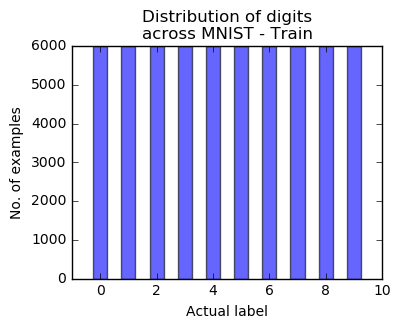

In [95]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(left=df_train["label"].value_counts().index,
       height=df_train["label"].value_counts().values,
      alpha=0.6,
      align="center",
      width=0.5)
ax.set_title("Distribution of digits\nacross MNIST - Train")
ax.set_xlim(-1, 10)
ax.set_xlabel("Actual label")
ax.set_ylabel("No. of examples")

### Transform train data for modeling

In [96]:
# Features
X = df_train.iloc[:, 1:].as_matrix()

In [97]:
# Target
y = df_train["label"].as_matrix()

### Fit the model

#### Algorithms

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf = RandomForestClassifier(random_state=42)

In [100]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [102]:
# Evaluate training fit
clf.score(X, y)

0.99535

### OOB Testing

#### Import test data

In [103]:
df_test = pd.read_csv("data/fashion-mnist_test.csv")

In [104]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [106]:
df_test.shape

(10000, 785)

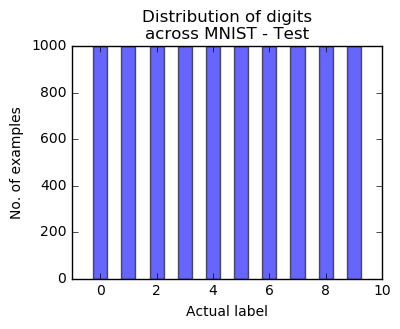

In [107]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(left=df_test["label"].value_counts().index,
       height=df_test["label"].value_counts().values,
      alpha=0.6,
      align="center",
      width=0.5)
ax.set_title("Distribution of digits\nacross MNIST - Test")
ax.set_xlim(-1, 10)
ax.set_xlabel("Actual label")
ax.set_ylabel("No. of examples")

### Transform test data for model evaluation

In [108]:
# Features
X_test = df_test.iloc[:, 1:].as_matrix()

### Generate predictions

In [110]:
predictions = clf.predict(X_test)

In [111]:
predictions

array([0, 1, 2, ..., 8, 8, 1])

In [112]:
# Write predictions back to test dataframe
df_test["predictions"] = predictions

In [113]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,predictions
0,0,0,0,0,0,0,0,0,9,8,...,87,56,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,63,53,31,0,0,0,2
3,2,0,0,0,0,0,0,0,0,0,...,126,140,0,133,224,222,56,0,0,6
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### Evaluation predictions

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [123]:
y_true = df_test["label"]
y_pred = df_test["predictions"]

In [124]:
mean_test_acc = accuracy_score(y_true, y_pred)

In [125]:
print("The mean test accuracy is %.2f%%" % (mean_test_acc*100))

The mean test accuracy is 86.39%


Classification report:

In [126]:
clf_rpt_test = classification_report(y_true, y_pred)

In [127]:
print(clf_rpt_test)

             precision    recall  f1-score   support

          0       0.78      0.84      0.81      1000
          1       0.98      0.96      0.97      1000
          2       0.75      0.81      0.78      1000
          3       0.87      0.91      0.89      1000
          4       0.77      0.79      0.78      1000
          5       0.95      0.94      0.94      1000
          6       0.71      0.56      0.63      1000
          7       0.91      0.92      0.91      1000
          8       0.96      0.96      0.96      1000
          9       0.93      0.94      0.93      1000

avg / total       0.86      0.86      0.86     10000



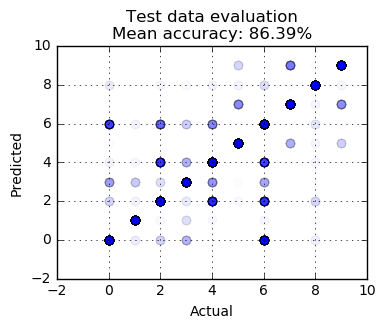

In [143]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(y_true, y_pred, alpha=0.01, s=40)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.grid()
ax.set_title("Test data evaluation\nMean accuracy: %.2f%%" % (mean_test_acc*100))

We can see from the classification report and visually from the above plot that the model has most trouble classifying 0, 2, 4 and 6 correctly.

0 and 6 are often confused.As are 2 and 6, and 4 and 6.

2 and 4 are also often confused.

If we can improve the overall classification of 6's (current F1 score is 0.63) then the overall model performance should improve greatly.